# Doing usual imports

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Grap the data

In [2]:
df = pd.read_csv(r'/Users/omarabdelaleem/Downloads/temps.csv')

In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Interesting!

if we look at the dimensions of the data, we notice that there are only 348 rows, which doesn’t quite agree with the 366 days we know there were in 2016. Looking through the data from the NOAA, I noticed several missing days.

Missing data can impact an analysis as can incorrect data or outliers. In this case, the missing data will not have a large effect, and the data quality is good because of the source. We also can see there are nine columns which represent eight features and the one target (‘actual’)

In [6]:
print('The shape of our features is:', df.shape)

The shape of our features is: (348, 12)


There are not any data points that immediately appear as anomalous and no zeros in any of the measurement columns. Another method to verify the quality of the data is make basic plots. Often it is easier to spot anomalies in a graph than in numbers.

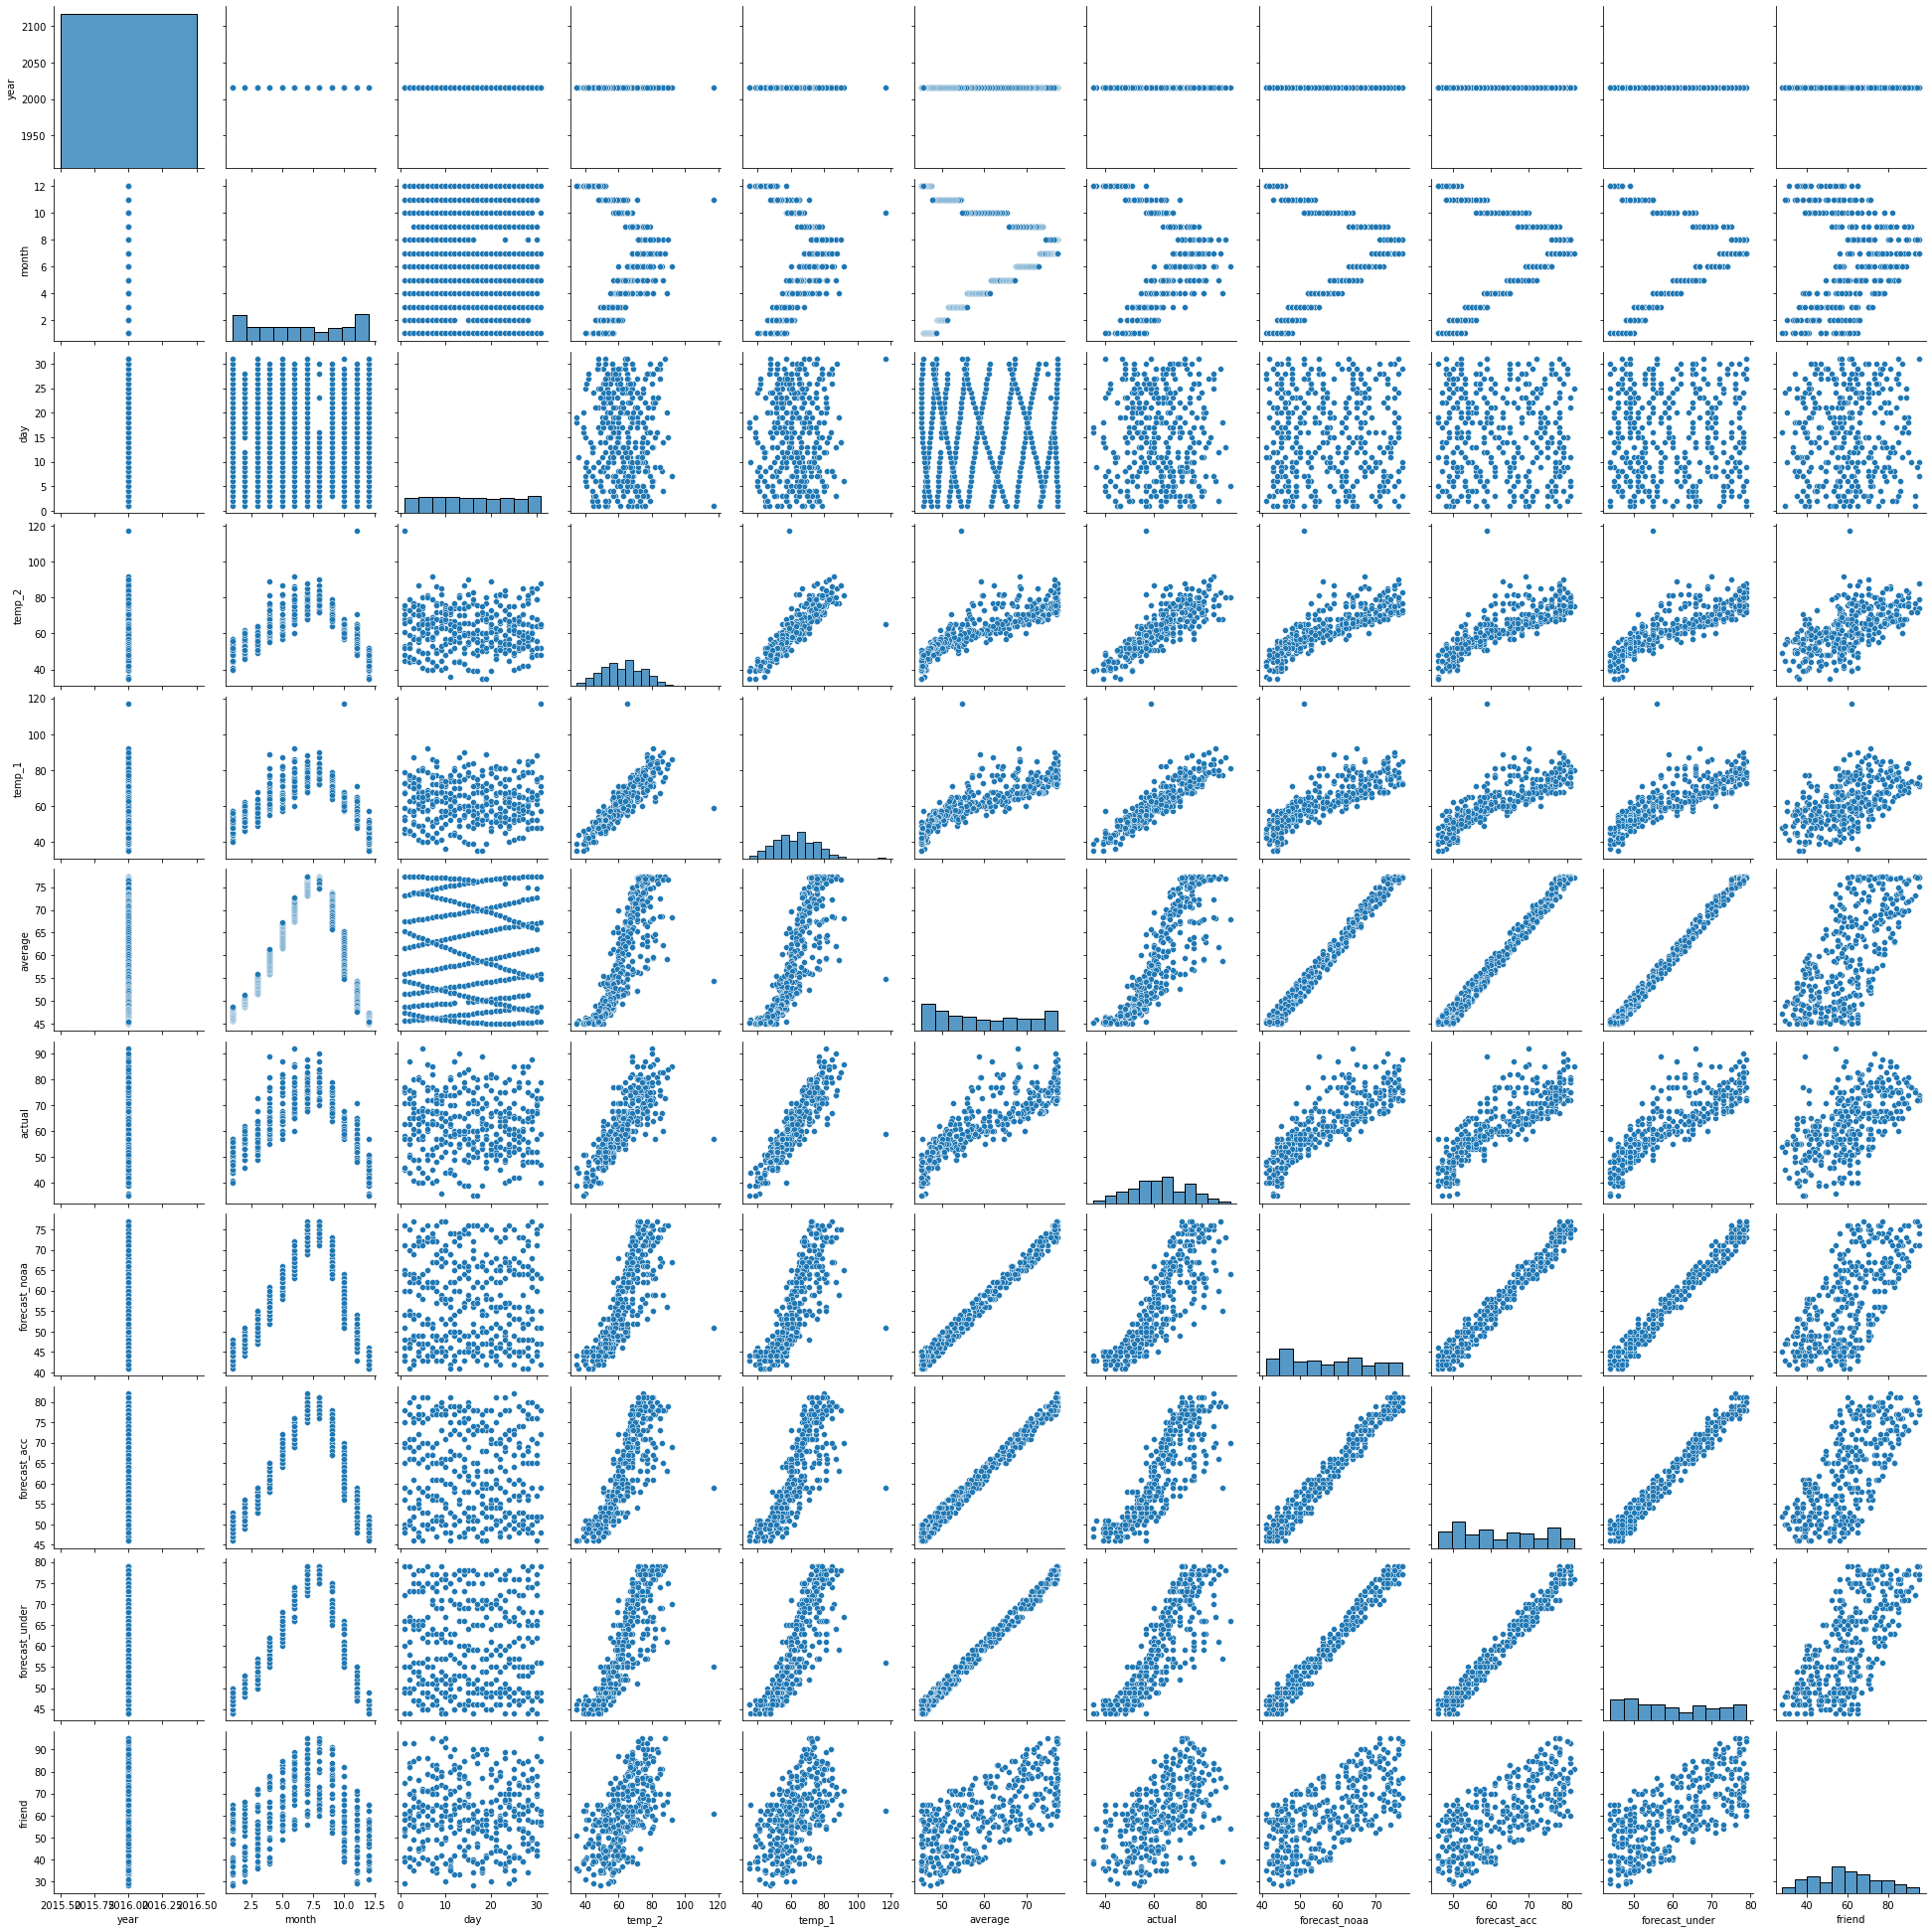

In [7]:
sns.pairplot(df)

Examining the quantitative statistics and the graphs, we can feel confident in the high quality of our data. There are no clear outliers, and although there are a few missing points, they will not detract from the analysis.

# Data preparation

Days of the week are intuitive to us because we use them all the time. You will (hopefully) never find anyone who doesn’t know that ‘Mon’ refers to the first day of the workweek, but machines do not have any intuitive knowledge. What computers know is numbers and for machine learning we must accommodate them. We could simply map days of the week to numbers 1–7, but this might lead to the algorithm placing more importance on Sunday because it has a higher numerical value. Instead, we change the single column of weekdays into seven columns of binary data.

In [8]:
#Making a quick copy of the original df
dframe = df.copy()

In [9]:
dframe=pd.get_dummies(df)

In [10]:
dframe.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [11]:
print('The old shape of our features is:', df.shape)
print('The new shape of our features is:', dframe.shape)

The old shape of our features is: (348, 12)
The new shape of our features is: (348, 18)


In [12]:
#Setting Label = the target value. (Actual maximum predicted temp)
label = np.array(dframe['actual'])

In [13]:
#Dropping the target Value from our data frame
dframe = dframe.drop('actual',axis=1)

In [14]:
dframe.head()

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,46,46,46,41,0,0,0,0,0,1,0


In [15]:
#Saving the columns' names for later visualization
dframe_list=list(dframe.columns)

#Converting to array for model fitting
dframe = np.array(dframe)

In [16]:
from sklearn.model_selection import train_test_split

I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.

In [17]:
#Setting X to be the features and Y to be the target value
X_train,X_test,Y_train,Y_test = train_test_split(dframe,label,test_size=0.25,random_state=42)

In [18]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.

In [19]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, dframe_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - Y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2),'degrees.')

Average baseline error:  5.06 degrees.


# Model Training (Fitting)

In [20]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 500 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Fit(Train) the model on training data
rf.fit(X_train, Y_train);

# Error Calculation

In [21]:
predicted = rf.predict(X_test)
errors = abs(predicted - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.91 degrees.


Our average estimate is off by 3.91 degrees. That is more than a 1 degree average improvement over the baseline. Although this might not seem significant, it is nearly 25% better than the baseline, which, depending on the field and the problem, could represent millions of dollars to a company.

To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error (MAPE) subtracted from 100 %.

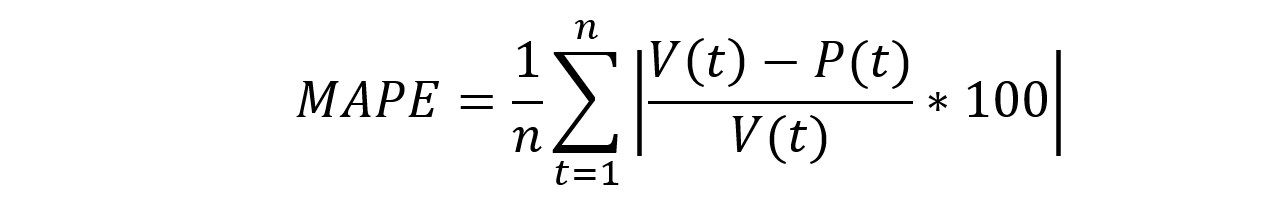

In [22]:
# MAPE
from IPython.display import Image

url = 'https://help.sap.com/doc/1befe448825347d4887fbc24b6d7f3b3/2019.1/en-US/loioeb041bbe0df84947914d58b0c3f60dd7_LowRes.png'

Image(url,width=1500)


In other words the MAPE could be defined as The Error Ratio devided by the Actual data

# Performance Check

In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

"""Displaying the accuracy"""
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 93.89 %.


That looks pretty good! Our model has learned how to predict the maximum temperature for the next day in Seattle with Nearly 94% accuracy.

In [24]:
# Use datetime for creating date objects for plotting
import datetime


plt.figure(figsize=(15,5))
# Dates of training values
months = dframe[:, dframe_list.index('month')]
days = dframe[:, dframe_list.index('day')]
years = dframe[:, dframe_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': label})

# Dates of predictions
months = X_test[:, dframe_list.index('month')]
days = X_test[:, dframe_list.index('day')]
years = X_test[:, dframe_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

NameError: name 'predictions' is not defined

<Figure size 1080x360 with 0 Axes>

It doesn’t look as if we have any noticeable outliers that need to be corrected.

# Interpret Model and Report Results

In [ ]:
pip install pydot

In [ ]:
conda install pygraphviz

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree', feature_names = dframe_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree')

# Write graph to a png file
graph.write_png('tree.png')

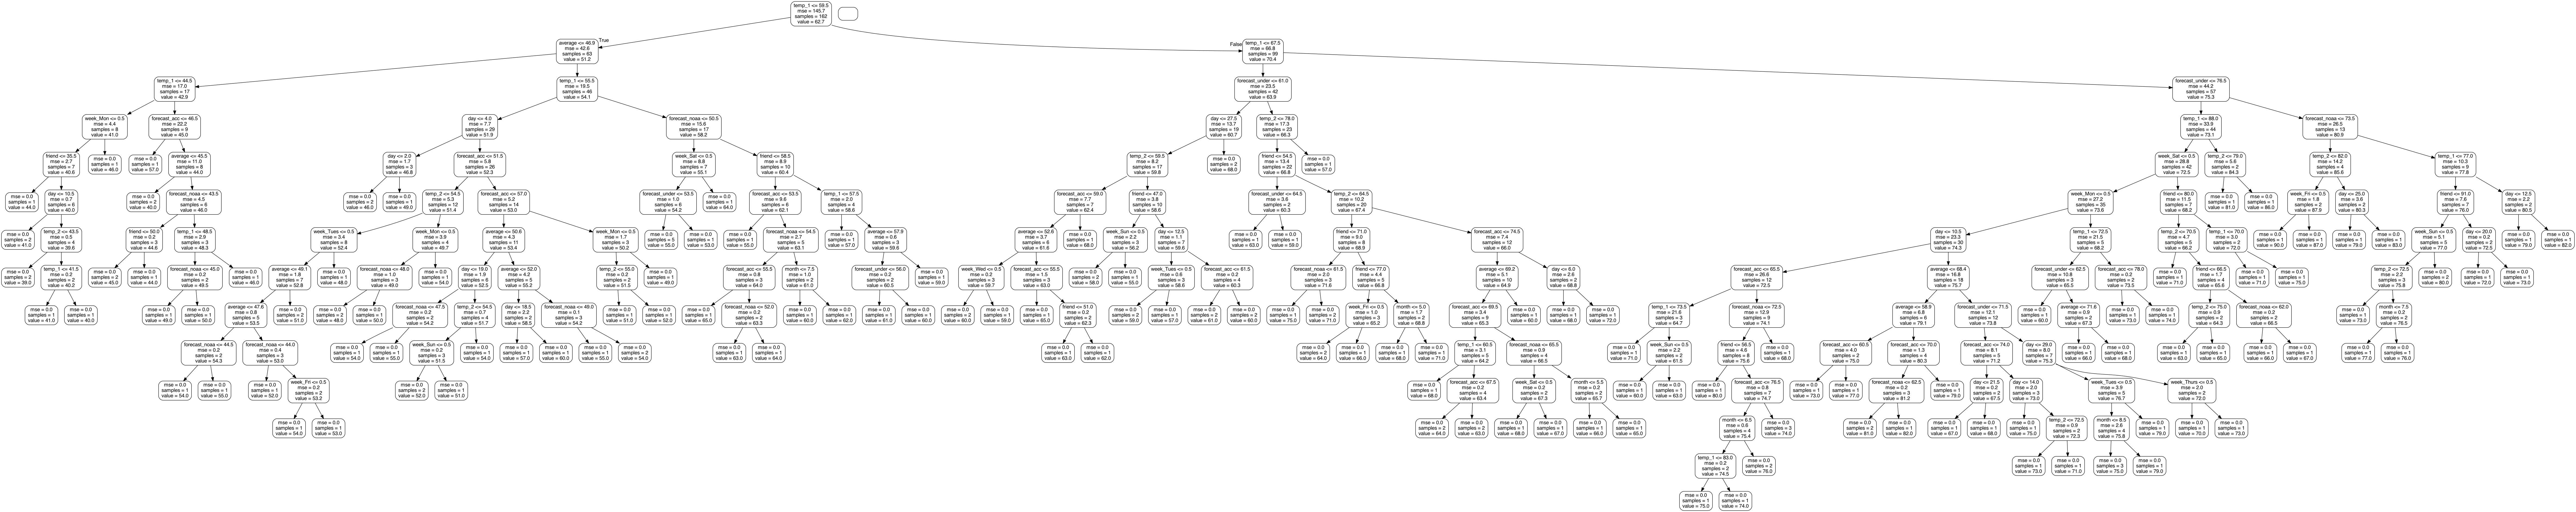

# I will limit the depth of trees in the forest to produce an understandable image.

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, Y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = dframe_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

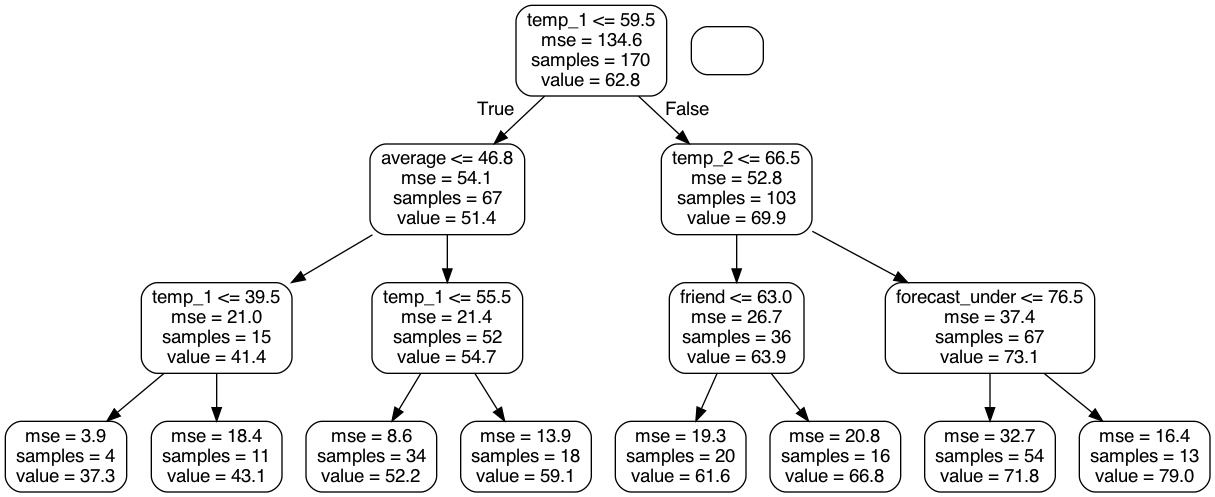

Based solely on this tree, we can make a prediction for any new data point. Let’s take an example of making a prediction for Wednesday, December 27, 2017. The (actual) variables are: temp_2 = 39, temp_1 = 35, average = 44, and friend = 30. We start at the root node and the first answer is True because temp_1 ≤ 59.5. We move to the left and encounter the second question, which is also True as average ≤ 46.8. Move down to the left and on to the third and final question which is True as well because temp_1 ≤ 44.5. Therefore, we conclude that our estimate for the maximum temperature is 41.0 degrees as indicated by the value in the leaf node. An interesting observation is that in the root node, there are only 162 samples despite there being 261 training data points. This is because each tree in the forest is trained on a random subset of the data points with replacement (called bagging, short for bootstrap aggregating).

# Observations

Furthermore, notice that in our tree, there are only 2 variables we actually used to make a prediction! According to this particular decision tree, the rest of the features are not important for making a prediction. Month of the year, day of the month, and our friend’s prediction are utterly useless for predicting the maximum temperature tomorrow! The only important information according to our simple tree is the temperature 1 day prior and the historical average. Visualizing the tree has increased our domain knowledge of the problem, and we now know what data to look for if we are asked to make a prediction!

# Variable Importances

In [25]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(dframe_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.14
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.04
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


 At the top of the list is temp_1, the max temperature of the day before. This tells us the best predictor of the max temperature for a day is the max temperature of the day before, a rather intuitive finding. The second most important factor is the historical average max temperature, also not that surprising. Your friend turns out to not be very helpful, along with the day of the week, the year, the month, and the temperature 2 days prior. These importances all make sense as we would not expect the day of the week to be a predictor of maximum temperature as it has nothing to do with weather. Moreover, the year is the same for all data points and hence provides us with no information for predicting the max temperature.

In [26]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 500, random_state=42)

# Extract the two most important features
important_indices = [dframe_list.index('temp_1'), dframe_list.index('average')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, Y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - Y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / Y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.95 degrees.
Accuracy: 93.74 %.


This tells us that we actually do not need all the data we collected to make accurate predictions! If we were to continue using this model, we could only collect the two variables and achieve nearly the same performance. In a production setting, we would need to weigh the decrease in accuracy versus the extra time required to obtain more information.

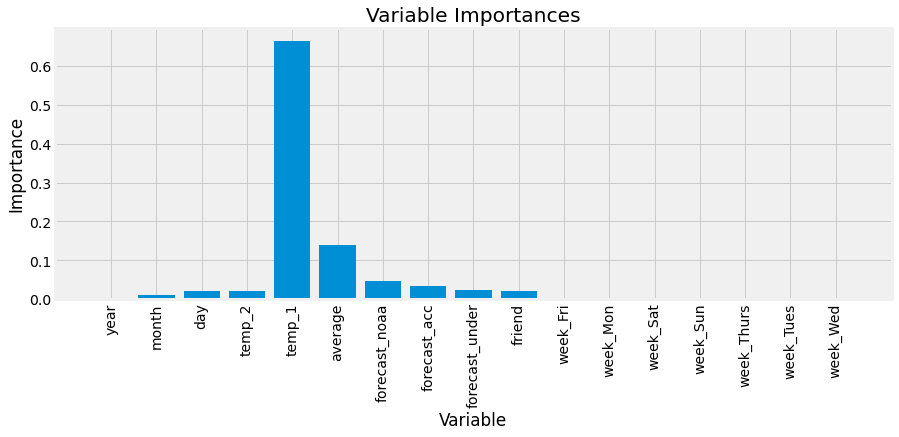

In [27]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, dframe_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

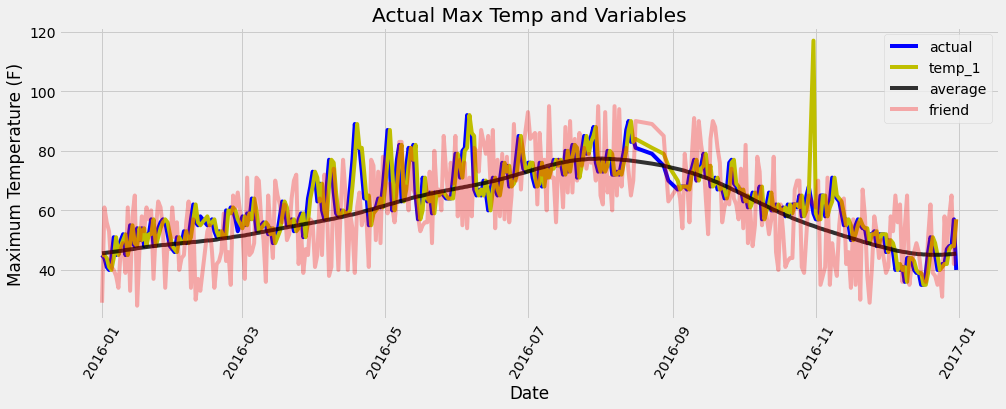

In [28]:
plt.figure(figsize=(15,5))
# Make the data accessible for plotting
true_data['temp_1'] = dframe[:, dframe_list.index('temp_1')]
true_data['average'] = dframe[:, dframe_list.index('average')]
true_data['friend'] = dframe[:, dframe_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

# Conclusion

we can see why the max temperature one day prior and the historical max temperature are useful for predicting max temperature while our friend is not

# By/ Omar Abdelaleem